# Workbook

Use this notebook to complete the exercises throughout the workshop.

#### Table of Contents
- [Section 1 &ndash; Getting Started with Pandas](#Section-1)
- [Section 2 &ndash; Data Wrangling](#Section-2)
- [Section 3 &ndash; Data Visualization](#Section-3)

--- 

### Section 1

#### Exercise 1.1
##### Create a DataFrame by reading in the `2019_Yellow_Taxi_Trip_Data.csv` file. Examine the first 5 rows.

In [12]:
import pandas as pd

In [13]:
df = pd.read_csv("../data/2019_Yellow_Taxi_Trip_Data.csv")
df.head(5)

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


#### Exercise 1.2
##### Find the dimensions (number of rows and number of columns) in the data.

In [14]:
df.shape

(10000, 18)

#### Exercise 1.3
##### Using the data in the `2019_Yellow_Taxi_Trip_Data.csv` file, calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns.

In [15]:
df.columns

Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'ratecodeid', 'store_and_fwd_flag',
       'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [16]:
df[['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']].describe() ### double [[]] if two or more

,fare_amount,tip_amount,tolls_amount,total_amount
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.106313,2.634494,0.623447,22.564659
std,13.954762,3.409800,6.437507,19.209255
min,-52.000000,0.000000,-6.120000,-65.920000
25%,7.000000,0.000000,0.000000,12.375000
50%,10.000000,2.000000,0.000000,16.300000
75%,16.000000,3.250000,0.000000,22.880000
max,176.000000,43.000000,612.000000,671.800000


In [17]:
df[['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']].describe().T

,count,mean,std,min,25%,50%,75%,max
fare_amount,10000.0,15.106313,13.954762,-52.00,7.000,10.0,16.00,176.0
tip_amount,10000.0,2.634494,3.409800,0.00,0.000,2.0,3.25,43.0
tolls_amount,10000.0,0.623447,6.437507,-6.12,0.000,0.0,0.00,612.0
total_amount,10000.0,22.564659,19.209255,-65.92,12.375,16.3,22.88,671.8


#### Exercise 1.4
##### Isolate the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` for the longest trip by distance (`trip_distance`).

In [18]:

df.trip_distance.max(), max(df.trip_distance)

(38.11, 38.11)

In [19]:
df[df.trip_distance==max(df.trip_distance)][['fare_amount','tip_amount','tolls_amount','total_amount']]

,fare_amount,tip_amount,tolls_amount,total_amount
8338,176.0,18.29,6.12,201.21


---

### Section 2

#### Exercise 2.1
##### Read in the meteorite data from the `Meteorite_Landings.csv` file, rename the `mass (g)` column to `mass`, and drop all the latitude and longitude columns. Sort the result by mass in descending order.

In [20]:
import pandas as pd

In [21]:
meteorites = pd.read_csv("../data/Meteorite_Landings.csv")
meteorites.head(5)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [22]:
meteorites.rename(columns={'mass (g)':"mass"}, inplace=True)
meteorites.drop(columns=['reclat','reclong'], inplace=True)
meteorites.sort_values(by="mass", ascending=False, inplace=True)
meteorites.head()

,name,id,nametype,recclass,mass,fall,year,GeoLocation
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,01/01/1920 12:00:00 AM,"(-19.58333, 17.91667)"
5373,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,01/01/1818 12:00:00 AM,"(76.13333, -64.93333)"
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,12/22/1575 12:00:00 AM,"(-27.46667, -60.58333)"
5370,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,01/01/1891 12:00:00 AM,"(35.05, -111.03333)"
3455,Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,01/01/1898 12:00:00 AM,"(47.0, 88.0)"


#### Exercise 2.2
##### Using the meteorite data from the `Meteorite_Landings.csv` file, update the `year` column to only contain the year, convert it to a numeric data type, and create a new column indicating whether the meteorite was observed falling before 1970. Set the index to the `id` column and extract all the rows with IDs between 10,036 and 10,040 (inclusive) with `loc[]`.

###### **Hint 1**: Use `year.str.slice()` to grab a substring.

###### **Hint 2**: Make sure to sort the index before using `loc[]` to select the range.

###### **Bonus**: There's a data entry error in the `year` column. Can you find it? (Don't spend too much time on this.)

In [7]:
import pandas as pd
import numpy as np
import datetime 


In [8]:
meteorites = pd.read_csv("../data/Meteorite_Landings.csv")
meteorites.head(5)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [25]:
meteorites['year'] = pd.to_datetime(meteorites['year'],errors = 'coerce' )  # change the format to date-time before
meteorites['only_year'] = pd.DatetimeIndex(meteorites['year']).year
meteorites.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,only_year
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01,50.77500,6.08333,"(50.775, 6.08333)",1880.0
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01,56.18333,10.23333,"(56.18333, 10.23333)",1951.0
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000,"(54.21667, -113.0)",1952.0
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01,16.88333,-99.90000,"(16.88333, -99.9)",1976.0
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01,-33.16667,-64.95000,"(-33.16667, -64.95)",1902.0


In [26]:
meteorites.loc[meteorites['only_year'] <= 1970, 'Year above or equel 1970?'] = 'True'
meteorites.loc[meteorites['only_year'] > 1970, 'Year above or equel 1970?'] = 'False'

meteorites.head(16)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,only_year,Year above or equel 1970?
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01,50.77500,6.08333,"(50.775, 6.08333)",1880.0,True
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01,56.18333,10.23333,"(56.18333, 10.23333)",1951.0,True
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000,"(54.21667, -113.0)",1952.0,True
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01,16.88333,-99.90000,"(16.88333, -99.9)",1976.0,False
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01,-33.16667,-64.95000,"(-33.16667, -64.95)",1902.0,True
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,1919-01-01,32.10000,71.80000,"(32.1, 71.8)",1919.0,True
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,910.0,Fell,1949-01-01,44.83333,95.16667,"(44.83333, 95.16667)",1949.0,True
7,Agen,392,Valid,H5,30000.0,Fell,1814-01-01,44.21667,0.61667,"(44.21667, 0.61667)",1814.0,True
8,Aguada,398,Valid,L6,1620.0,Fell,1930-01-01,-31.60000,-65.23333,"(-31.6, -65.23333)",1930.0,True
9,Aguila Blanca,417,Valid,L,1440.0,Fell,1920-01-01,-30.86667,-64.55000,"(-30.86667, -64.55)",1920.0,True


In [27]:
data = pd.read_csv("../data/Meteorite_Landings.csv", index_col ="id")
meteorites.sort_index(inplace=True)
meteorites.loc[10036:10040]


,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,only_year,Year above or equel 1970?
10036,Elephant Moraine 90022,8432,Valid,CK5,15.5,Found,1990-01-01,-76.28573,156.45721,"(-76.28573, 156.45721)",1990.0,False
10037,Elephant Moraine 90023,8433,Valid,CK5,31.5,Found,1990-01-01,-76.27507,156.41038,"(-76.27507, 156.41038)",1990.0,False
10038,Elephant Moraine 90024,8434,Valid,Eucrite-br,22.8,Found,1990-01-01,-76.28843,156.47872,"(-76.28843, 156.47872)",1990.0,False
10039,Elephant Moraine 90025,8435,Valid,CK5,45.8,Found,1990-01-01,-76.28200,156.39926,"(-76.282, 156.39926)",1990.0,False
10040,Elephant Moraine 90026,8436,Valid,CK5,61.5,Found,1990-01-01,-76.29226,156.45353,"(-76.29226, 156.45353)",1990.0,False


In [28]:
###### **Bonus**:



#### Exercise 2.3
##### Using the meteorite data from the `Meteorite_Landings.csv` file, create a pivot table that shows both the number of meteorites and the 95th percentile of meteorite mass for those that were found versus observed falling per year from 2005 through 2009 (inclusive). Hint: Be sure to convert the `year` column to a number as we did in the previous exercise.

In [9]:
import pandas as pd
import numpy as np
import datetime as dt


In [10]:
meteorites = pd.read_csv("../data/Meteorite_Landings.csv")

meteorites['year'] = pd.to_datetime(meteorites['year'],errors='coerce') 
meteorites['only_year'] = pd.DatetimeIndex(meteorites['year']).year

meteorites.rename(columns={'mass (g)':"mass"}, inplace=True)

meteorites.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,only_year
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01,50.77500,6.08333,"(50.775, 6.08333)",1880.0
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01,56.18333,10.23333,"(56.18333, 10.23333)",1951.0
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000,"(54.21667, -113.0)",1952.0
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01,16.88333,-99.90000,"(16.88333, -99.9)",1976.0
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01,-33.16667,-64.95000,"(-33.16667, -64.95)",1902.0


In [15]:
my_data = meteorites.loc[(meteorites['only_year'] >= 2005) & (meteorites['only_year'] <= 2009)]
my_data

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,only_year
30,Almahata Sitta,48915,Valid,Ureilite-an,3950.000,Fell,2008-01-01,20.74575,32.41275,"(20.74575, 32.41275)",2008.0
49,Ash Creek,48954,Valid,L6,9500.000,Fell,2009-01-01,31.80500,-97.01000,"(31.805, -97.01)",2009.0
82,Bassikounou,44876,Valid,H5,29560.000,Fell,2006-01-01,15.78333,-5.90000,"(15.78333, -5.9)",2006.0
101,Berduc,48975,Valid,L6,270.000,Fell,2008-01-01,-31.91000,-58.32833,"(-31.91, -58.32833)",2008.0
148,Bunburra Rockhole,48653,Valid,Eucrite,324.000,Fell,2007-01-01,-31.35000,129.19000,"(-31.35, 129.19)",2007.0
...,...,...,...,...,...,...,...,...,...,...,...
38396,Yabrin 003,48974,Valid,Acapulcoite,21.048,Found,2008-01-01,23.31522,48.62988,"(23.31522, 48.62988)",2008.0
45664,Yaringie Hill,48950,Valid,H5,5750.000,Found,2006-01-01,-32.08287,135.64985,"(-32.08287, 135.64985)",2006.0
45668,Yarle Lakes 004,52945,Valid,CK4,4.600,Found,2009-01-01,-30.50000,131.46667,"(-30.5, 131.46667)",2009.0
45674,Yelland Dry Lake,52641,Valid,H4,76000.000,Found,2007-01-01,39.35067,-114.40783,"(39.35067, -114.40783)",2007.0


In [50]:
pivot_table = pd.pivot_table(my_data, values = 'mass', index='only_year', columns = 'fall').reset_index()

pivot_table
#wanted to try with pivot table

fall,only_year,Fell,Found
0,2005.0,NaN,2148.813936
1,2006.0,8844.600000,2071.143612
2,2007.0,21944.801250,462.655226
3,2008.0,30941.444444,1233.549207
4,2009.0,3109.310000,1516.869149


In [37]:
my_data.groupby(['only_year','fall']).agg({'fall':'count','mass':[lambda x: np.percentile(x, 95)]})

fall       mass
                count   <lambda>
only_year fall                  
2005.0    Found   875        NaN
2006.0    Fell      5   25008.00
          Found  2451        NaN
2007.0    Fell      8   89675.00
          Found  1181    1126.90
2008.0    Fell      9  106000.00
          Found   948    2274.80
2009.0    Fell      5    8333.40
          Found  1492    1397.25

#### Exercise 2.4
##### Using the meteorite data from the `Meteorite_Landings.csv` file, compare summary statistics of the mass column for the meteorites that were found versus observed falling.

In [52]:
my_data.groupby(['fall']).describe()['mass']

,count,mean,std,min,25%,50%,75%,max
fall,,,,,,,,
Fell,27.0,19029.665185,34081.623779,18.41,410.0,3950.0,8206.5,110000.0
Found,6945.0,1573.986245,42020.893987,0.00,7.5,34.5,197.0,3000000.0


#### Exercise 2.5
##### Using the taxi trip data in the `2019_Yellow_Taxi_Trip_Data.csv` file, resample the data to an hourly frequency based on the dropoff time. Calculate the total `trip_distance`, `fare_amount`, `tolls_amount`, and `tip_amount`, then find the 5 hours with the most tips.

In [40]:
taxi_data = pd.read_csv("../data/2019_Yellow_Taxi_Trip_Data.csv")
taxi_data.head()
#TODO in progress

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


--- 

### Section 3

#### Exercise 3.1
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create box plots for traveler throughput for each year in the data. Hint: Pass `kind='box'` into the `plot()` method to generate box plots.

In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plot
from matplotlib import ticker

In [12]:
#TODO in progress
tsa_melted_holiday_travel = pd.read_csv('../data/tsa_melted_holiday_travel.csv', index_col='date')
tsa_melted_holiday_travel.head()

,year,travelers,holiday
date,,,
2019-01-01,2019,2126398.0,New Year's Day
2019-01-02,2019,2345103.0,New Year's Day
2019-01-03,2019,2202111.0,NaN
2019-01-04,2019,2150571.0,NaN
2019-01-05,2019,1975947.0,NaN


In [13]:
# tsa_melted_holiday_travel.drop(columns = ['holiday'])
tsa_year=tsa_melted_holiday_travel.groupby(['year']).count().drop(columns = ['holiday'])
tsa_year.T

# ax = tsa_year.plot(
#     kind='box', xlabel='year', ylabel='travelers',
#     figsize=(8, 1.5), title='TSA Yearly Traveler Throughput'
# )


year,2019,2020,2021
travelers,365,365,134


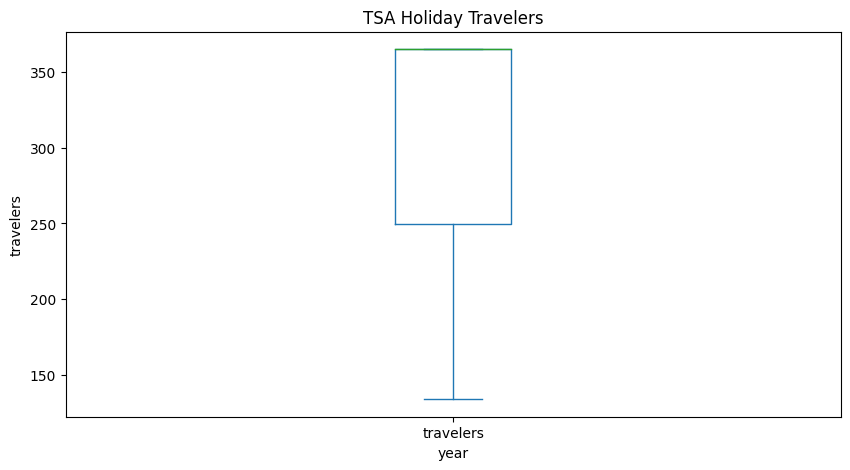

In [14]:
ax = tsa_year.plot(kind='box', figsize=(10,5))
ax.set(xlabel="year", ylabel="travelers", title="TSA Holiday Travelers")
ax.yaxis.set_major_formatter(ticker.EngFormatter())


#### Exercise 3.2
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create a heatmap that shows the 2019 TSA median traveler throughput by day of week and month.

In [ ]:
#TODO in progress

#### Exercise 3.3
##### Annotate the medians in the box plot from *[Exercise 3.1](#Exercise-3.1)*. Hint: The `x` coordinates will be 1, 2, and 3 for 2019, 2020, and 2021, respectively. Alternatively, to avoid hardcoding values, you can use the `Axes.get_xticklabels()` method, in which case you should look at the [documentation](https://matplotlib.org/stable/api/text_api.html) for the `Text` class.